In [1]:
import src.pmcmc.main as pmcmc_main

In [2]:
pmcmc_main.main("06", "2024-04-27")

PMCMC Progress: 0it [00:00, ?it/s]                                        2.62s/it]


Array([[0.001     , 0.0160432 , 0.01137184, ..., 0.12982485, 0.1329946 ,
        0.07626459],
       [0.03911028, 0.02117727, 0.01048695, ..., 0.13356994, 0.14157389,
        0.07697827],
       [0.03890042, 0.00979877, 0.01719936, ..., 0.14468148, 0.07808767,
        0.07116866],
       ...,
       [0.0077249 , 0.03675001, 0.01735836, ..., 0.14329055, 0.10131744,
        0.11598902],
       [0.01654181, 0.02720235, 0.02637609, ..., 0.09627733, 0.09262025,
        0.09614211],
       [0.0024256 , 0.03214093, 0.03528871, ..., 0.11011785, 0.09593406,
        0.09418713]], dtype=float32)

In [6]:
import os
import pandas as pd
from src.utils import paths
import numpy as np

loc_code = "06"
base_dir = os.path.join(paths.OUTPUT_DIR, "pmcmc_runs")
loc_dir = os.path.join(base_dir, loc_code)
mle_states_path = os.path.join(loc_dir, "mle_hosp_est_20241020.npy")

In [7]:
states_np = np.load(mle_states_path)

In [8]:
new_h = states_np[:, :]

In [9]:
new_h_df = pd.DataFrame(data=new_h)

In [17]:
new_h_df.drop(columns=[0, 1], inplace=True)

In [18]:
daily_estimates_df = new_h_df

In [19]:
# Get true hospitalization data

file_path = os.path.join(paths.DATASETS_DIR, "hosp_data", "hosp_06.csv")
all_hosp_data = pd.read_csv(file_path)
subset_df = all_hosp_data[
    (all_hosp_data["date"] <= "2024-04-27") & (all_hosp_data["date"] >= "2023-06-27")
]
subset_df

,Unnamed: 0,date,state,previous_day_admission_influenza_confirmed
1218,77220,2023-06-27,CA,9.0
1219,75552,2023-06-28,CA,8.0
1220,79361,2023-06-29,CA,6.0
1221,79073,2023-06-30,CA,10.0
1222,78417,2023-07-01,CA,6.0
...,...,...,...,...
1519,67789,2024-04-23,CA,24.0
1520,69694,2024-04-24,CA,23.0
1521,65916,2024-04-25,CA,23.0
1522,61605,2024-04-26,CA,14.0


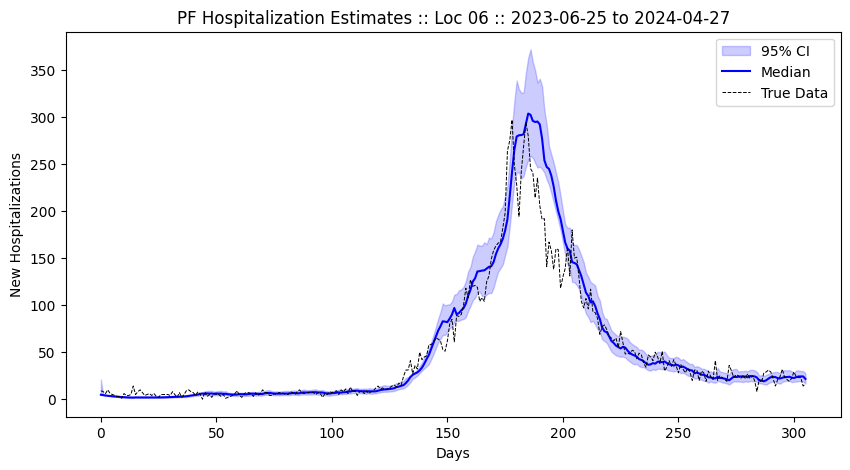

In [20]:
import matplotlib.pyplot as plt

quantiles = daily_estimates_df.quantile([0.025, 0.5, 0.975], axis=0)
plt.figure(figsize=(10, 5))
plt.fill_between(
    range(daily_estimates_df.shape[1]),
    quantiles.loc[0.025],
    quantiles.loc[0.975],
    color="b",
    alpha=0.2,
    label="95% CI",
)
plt.plot(
    range(daily_estimates_df.shape[1]), quantiles.loc[0.5], color="b", label="Median"
)
plt.plot(
    range(daily_estimates_df.shape[1]),
    subset_df["previous_day_admission_influenza_confirmed"],
    color="black",
    label="True Data",
    lw=0.7,
    ls="--",
)
plt.xlabel("Days")
plt.ylabel("New Hospitalizations")
plt.title("PF Hospitalization Estimates :: Loc 06 :: 2023-06-25 to 2024-04-27")
plt.legend()
plt.show()

In [16]:
mle_betas_path = os.path.join(os.path.join(loc_dir, "mle_betas_test_8:44_20241020.csv"))

betas_df = pd.read_csv(mle_betas_path)

In [17]:
betas_df.drop(columns=["Unnamed: 0"], inplace=True)

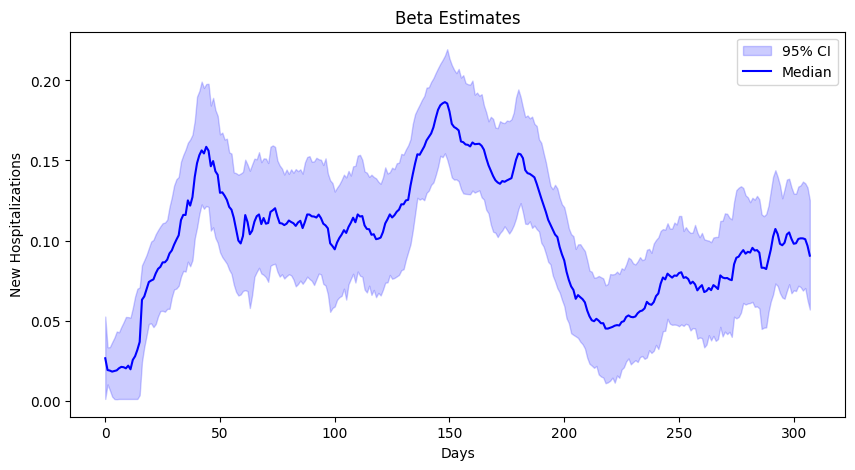

In [19]:
quantiles = betas_df.quantile([0.025, 0.5, 0.975], axis=0)
plt.figure(figsize=(10, 5))
plt.fill_between(
    range(betas_df.shape[1]),
    quantiles.loc[0.025],
    quantiles.loc[0.975],
    color="b",
    alpha=0.2,
    label="95% CI",
)
plt.plot(range(betas_df.shape[1]), quantiles.loc[0.5], color="b", label="Median")
plt.xlabel("Days")
plt.ylabel("New Hospitalizations")
plt.title("Beta Estimates")
plt.legend()
plt.show()